In [70]:
import fowl
import time
import importlib
import os
importlib.reload(fowl)

<module 'fowl' from 'X:\\Johannes_20211108\\fowl.py'>

In [37]:
today = fowl.fowl_session("20211108",".")

In [38]:
today.load_from_disk()

Loading file .\20211108_20211108-113955.npy


In [17]:
today.add_current_setting("template_matching")

In [20]:
today.write_to_disk()

In [13]:
today.state["stage_at_eucentric"] = fowl.serialem.ReportStageXYZ()

In [14]:
today.state["defocus_fringe_free"] = fowl.serialem.ReportDefocus()

In [15]:
today.state["stage_at_low_def_fringe_free"] = fowl.serialem.ReportStageXYZ()

In [24]:
today.state

{'grids': [],
 'microscope_settings': {'tomography': {'magnification': (33000.0, 0.0),
   'magnification_index': (26.0, 0.0),
   'spot_size': 9.0,
   'illuminated_area': 0.009815440736276958,
   'beam_tilt': (6.267707418088295, 1.5882013515270832),
   'objective_stigmator': (0.002204365566601873, -0.008642646139703974),
   'fringe_free': False},
  'template_matching': {'magnification': (64000.0, 0.0),
   'magnification_index': (29.0, 0.0),
   'spot_size': 8.0,
   'illuminated_area': 0.005550905274059485,
   'beam_tilt': (6.3030687676709665, 1.8342743889130237),
   'objective_stigmator': (0.004059167659168261, 0.00198462202628627),
   'fringe_free': False}},
 'stage_at_eucentric': (299.4250387, 7.3464800000000015, 9.7678059728),
 'defocus_fringe_free': 30.561911478106282,
 'stage_at_low_def_fringe_free': (299.38902659999997,
  6.909464000000001,
  -22.6337646848)}

44 e/pix/s for tm => 1.2s exposure

In [39]:
lamella1 = fowl.fowl_acquisition_area(name="lamella1",directory="./grid2/lamella1/",beam_radius=0.25,start_from=-15.0,defocus=-0.8)

In [40]:
lamella1.frames_directory

'./grid2/lamella1/frames'

In [35]:
lamella1.directory

'./grid2/lamella1/'

In [41]:
lamella1.initialize_from_navigator(item=8)

In [42]:
lamella1.calculate_acquisition_positions()

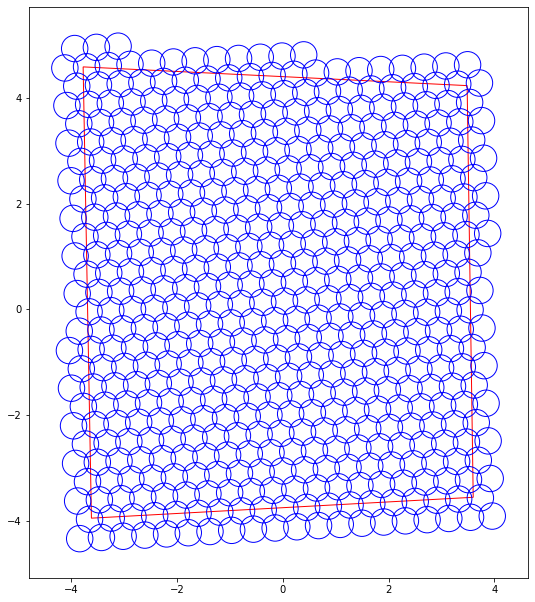

In [43]:
lamella1.plot_acquisition_positions()

In [44]:
len(lamella1.state["acquisition_positions"])

501

In [47]:
lamella1.write_to_disk()

In [ ]:
fowl.serialem.LongOperation("Da","2")
fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella1.directory),"frames/"))

fowl.serialem.GoToLowDoseArea('R')
fowl.serialem.SetDefocus(24.0)
fowl.serialem.ManageDewarsAndPumps(-1)
while fowl.serialem.AreDewarsFilling():
    time.sleep(60)
lamella1.acquire_single_tilt_slow(tilt=-15.0)
lamella1.write_to_disk()

In [48]:
lamella2 = fowl.fowl_acquisition_area(name="lamella2",directory="./grid2/lamella2/",beam_radius=0.25,start_from=-15.0,defocus=-0.8)
lamella3 = fowl.fowl_acquisition_area(name="lamella3",directory="./grid2/lamella3/",beam_radius=0.25,start_from=-15.0,defocus=-0.8)
lamella4 = fowl.fowl_acquisition_area(name="lamella4",directory="./grid2/lamella4/",beam_radius=0.25,start_from=-15.0,defocus=-0.8)

In [49]:
lamella2.initialize_from_navigator(item=13)
lamella3.initialize_from_navigator(item=18)
lamella4.initialize_from_navigator(item=23)

In [ ]:
for lamella in [lamella2,lamella3,lamella4]:
    fowl.serialem.LongOperation("Da","2")
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    fowl.serialem.GoToLowDoseArea('V')
    fowl.serialem.SetDefocus(-20)
    lamella.move_to_position()
    fowl.serialem.GoToLowDoseArea('R')
    fowl.serialem.SetDefocus(25)
    fowl.serialem.ManageDewarsAndPumps(-1)
    while fowl.serialem.AreDewarsFilling():
        time.sleep(60)
    lamella.acquire_single_tilt_slow(tilt=-15.0)
    lamella.write_to_disk()

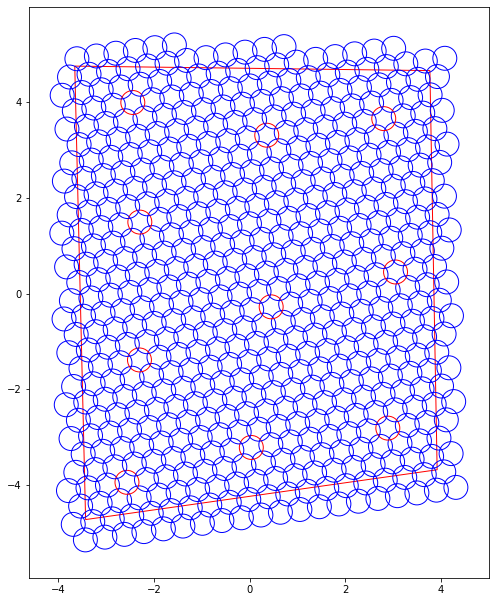

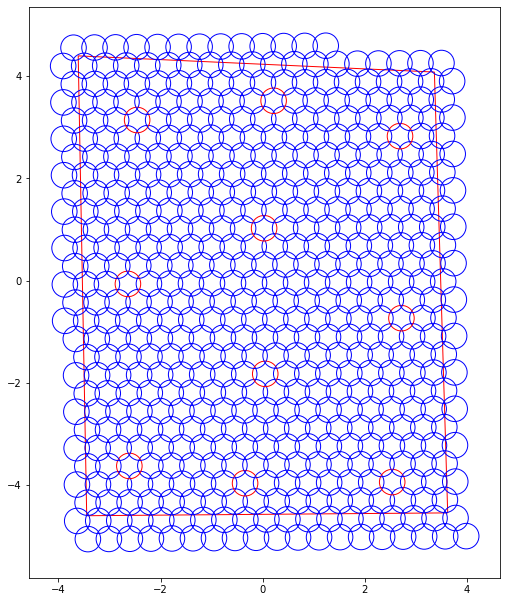

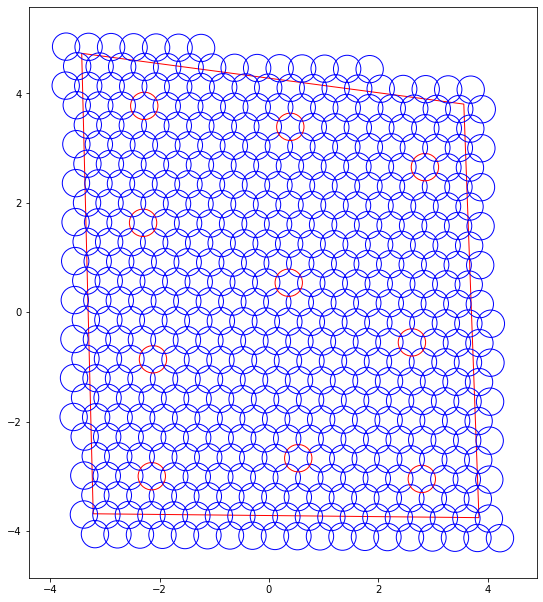

In [50]:
for lamella in [lamella2,lamella3,lamella4]:
    lamella.calculate_acquisition_positions()
    lamella.designate_calibration_positions()
    lamella.plot_acquisition_positions()
    lamella.write_to_disk()

In [52]:
fowl.serialem.Exit(1)

In [53]:
today.state

{'grids': [],
 'microscope_settings': {'tomography': {'magnification': (33000.0, 0.0),
   'magnification_index': (26.0, 0.0),
   'spot_size': 9.0,
   'illuminated_area': 0.009815440736276958,
   'beam_tilt': (6.267707418088295, 1.5882013515270832),
   'objective_stigmator': (0.002204365566601873, -0.008642646139703974),
   'fringe_free': False},
  'template_matching': {'magnification': (64000.0, 0.0),
   'magnification_index': (29.0, 0.0),
   'spot_size': 8.0,
   'illuminated_area': 0.005550905274059485,
   'beam_tilt': (6.3030687676709665, 1.8342743889130237),
   'objective_stigmator': (0.004059167659168261, 0.00198462202628627),
   'fringe_free': False}},
 'stage_at_eucentric': (299.4250387, 7.3464800000000015, 9.7678059728),
 'defocus_fringe_free': 30.561911478106282,
 'stage_at_low_def_fringe_free': (299.38902659999997,
  6.909464000000001,
  -22.6337646848)}

In [56]:
fowl.serialem.UpdateLowDoseParams('R',1)
fowl.serialem.SetMag(today.state['microscope_settings']['tomography']['magnification'][0])
fowl.serialem.SetSpotSize(int(today.state['microscope_settings']['tomography']['spot_size']))
fowl.serialem.SetIlluminatedArea(today.state['microscope_settings']['tomography']['illuminated_area'])
fowl.serialem.SetBeamTilt(today.state['microscope_settings']['tomography']['beam_tilt'][0],today.state['microscope_settings']['tomography']['beam_tilt'][1])
fowl.serialem.SetObjectiveStigmator(today.state['microscope_settings']['tomography']['objective_stigmator'][0],today.state['microscope_settings']['tomography']['objective_stigmator'][1])

In [73]:
lamellas = []
for i,itemid in enumerate([24,29,34,39]):
    new_lamella = fowl.fowl_acquisition_area(name=f"lamella{i}_tomo",directory=f"./grid2/lamella{i}_tomo/",beam_radius=0.44,start_from=-15.0,defocus=-8.0,exposure_time=0.35)
    new_lamella.load_from_disk()
    lamellas.append(new_lamella)
    

Loading file ./grid2/lamella0_tomo\lamella0_tomo_20211108-183607.npy
Loading file ./grid2/lamella1_tomo\lamella1_tomo_20211108-182915.npy
Loading file ./grid2/lamella2_tomo\lamella2_tomo_20211108-182936.npy
Loading file ./grid2/lamella3_tomo\lamella3_tomo_20211108-182955.npy


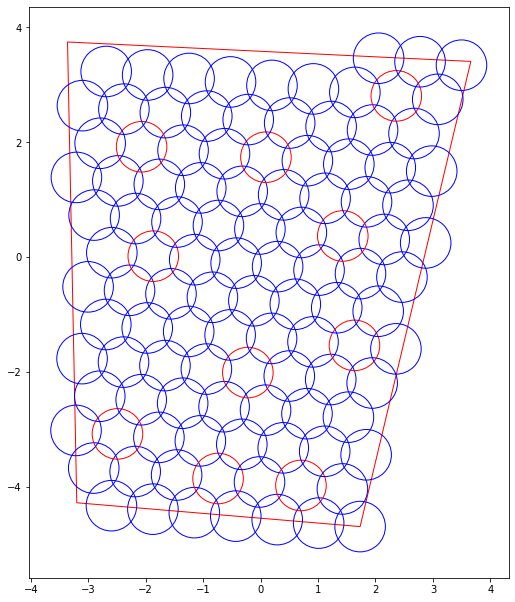

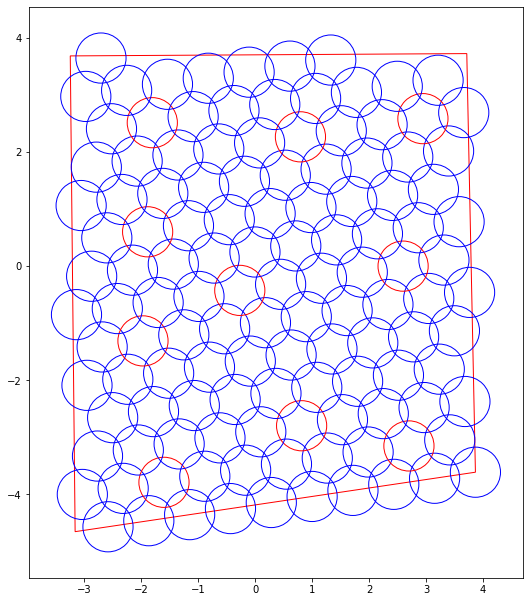

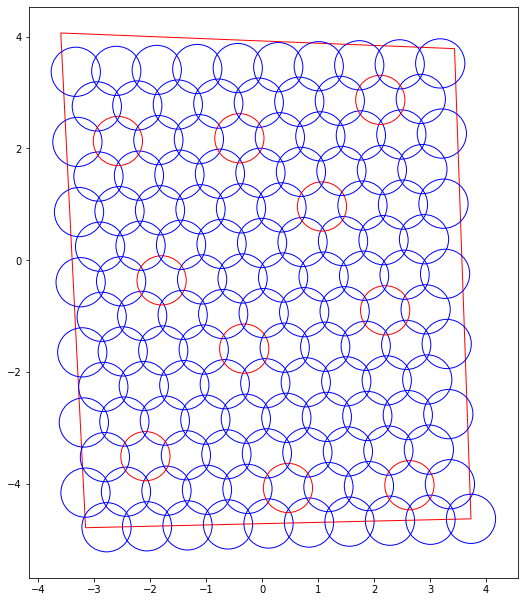

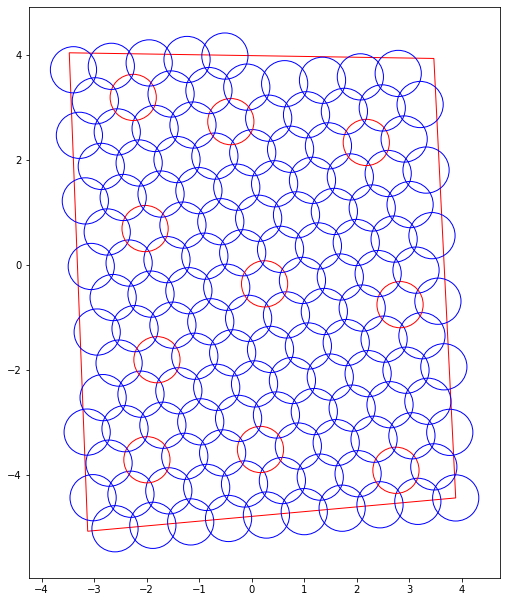

In [67]:
it = [24,29,34,39]
for i,lamella in enumerate(lamellas):
    new_lamella.initialize_from_navigator(item=it[i])
    lamella.calculate_acquisition_positions(expansion=1.0)
    lamella.designate_calibration_positions()
    lamella.plot_acquisition_positions()
    lamella.write_to_disk()

In [76]:
for lamella in lamellas:
    fowl.serialem.LongOperation("Da","2")
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    lamella.move_to_position()
    fowl.serialem.ManageDewarsAndPumps()
    while fowl.serialem.AreDewarsFilling():
        time.sleep(60)
    lamella.perform_defocus_calibration(-15.0,use_existing_tilt=False)
    lamella.analyze_defocus_calibration(-15.0)
    lamella.acquire_data(-15.0)
    lamella.write_to_disk()
    for i in range(34):
        i+=1
        tilt = lamella1.state["tilts"][i]
        fowl.serialem.ManageDewarsAndPumps()
        while fowl.serialem.AreDewarsFilling():
            time.sleep(60)
        lamella.perform_defocus_calibration(tilt,use_existing_tilt=True)
        lamella.analyze_defocus_calibration(tilt)
        lamella.acquire_data(tilt)
        lamella.write_to_disk()
fowl.serialem.SetColumnOrGunValve(0)

Calibrating assuming a flat sample
Measured defocus of -7.87056796875, adjusting by -0.12943203125000036 to get to -8.0
Measured defocus of -8.26256875, adjusting by 0.2625687499999998 to get to -8.0
Measured defocus of -7.9370875, adjusting by -0.06291250000000037 to get to -8.0
Measured defocus of -8.0616546875, adjusting by 0.061654687500000804 to get to -8.0
Measured defocus of -7.90589453125, adjusting by -0.09410546874999959 to get to -8.0
Measured defocus of -7.6927671875, adjusting by -0.3072328124999997 to get to -8.0
Measured defocus of -8.4554765625, adjusting by 0.45547656249999946 to get to -8.0
Measured defocus of -8.0075875, adjusting by 0.007587499999999636 to get to -8.0
Measured defocus of -7.777075, adjusting by -0.22292500000000004 to get to -8.0
Measured defocus of -8.22992890625, adjusting by 0.2299289062500005 to get to -8.0
At tilt -15.0 using 10 measurements
solution: -0.008285 x + -0.059579 y + 0.866998 = z
Calibrating, starting from calibration at tilt -15.0


In [75]:
fowl.serialem.SetColumnOrGunValve(1)